In [5]:
import pandas as pd 

%matplotlib inline 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from modelSelect import ModelSelect
import matplotlib.pyplot as plt
from data_prep import CompanyDataClean

In [12]:
df_train = pd.read_csv('data/churn_train.csv')
df_test = pd.read_csv('data/churn_test.csv')
df_train_class = CompanyDataClean(df_train)
df_test_class = CompanyDataClean(df_test)

In [13]:
df_train = df_train_class.numerical_data()
df_test = df_test_class.numerical_data()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [15]:
X_train = df_train.drop("churn",axis=1)
y_train = df_train['churn']
X_test = df_test.drop("churn",axis=1)
y_test = df_test['churn']

In [20]:
n_estimator = 10

lm = LogisticRegression()
grd = GradientBoostingClassifier(n_estimators=n_estimator)
rf1 = RandomForestClassifier(n_estimators=n_estimator) 

model_list = [lm, grd, rf1]

fprs = []
tprs = []
for model in model_list:
    model = ModelSelect(model,model.__class__.__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    fprs.append(fpr)
    tprs.append(tpr)

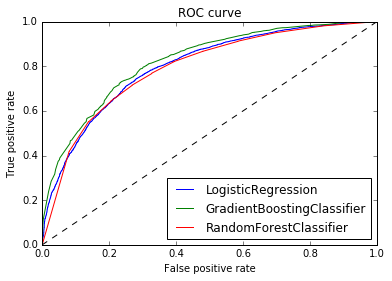

In [21]:

fig = plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for (fpr,tpr,model) in zip(fprs,tprs,model_list):
    plt.plot(fpr, tpr, label='{}'.format(model.__class__.__name__))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

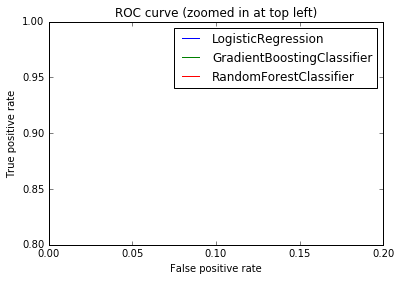

In [18]:
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
for fpr,tpr,model in zip(fprs,tprs,model_list):
    plt.plot(fpr, tpr, label='{}'.format(model.__class__.__name__))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()